<a href="https://colab.research.google.com/github/sherylshiya/machine_learning_projects/blob/main/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data= pd.read_csv("/Users/sheryldekshanya/Downloads/auto-mpg.csv")

In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

<Axes: ylabel='mpg'>

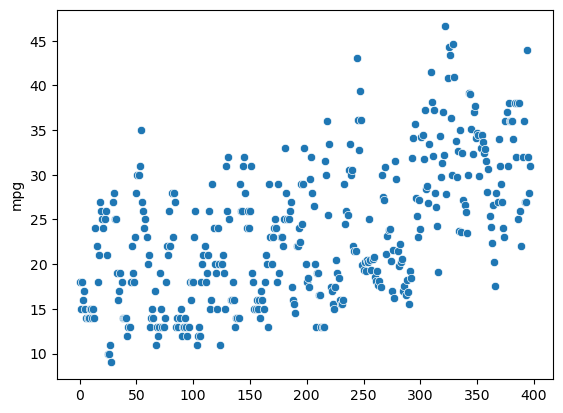

In [ ]:
sns.scatterplot(data.mpg)

In [ ]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
for col in data:
    print(col)
    print(data[col].unique())
    print()

mpg
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

cylinders
[8 4 6 3 5]

displacement
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262

In [ ]:
data['horsepower']=data['horsepower'].replace('?',np.nan)

In [ ]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data['horsepower']=data['horsepower'].astype('float64')
print(data['horsepower'].unique())
data=data.drop('car name',axis=1)

[130.  165.  150.  140.  198.  220.  215.  225.  190.  170.  160.   95.
  97.   85.   88.   46.   87.   90.  113.  200.  210.  193.   93.5 100.
 105.  175.  153.  180.  110.   72.   86.   70.   76.   65.   69.   60.
  80.   54.  208.  155.  112.   92.  145.  137.  158.  167.   94.  107.
 230.   49.   75.   91.  122.   67.   83.   78.   52.   61.   93.  148.
 129.   96.   71.   98.  115.   53.   81.   79.  120.  152.  102.  108.
  68.   58.  149.   89.   63.   48.   66.  139.  103.  125.  133.  138.
 135.  142.   77.   62.  132.   84.   64.   74.  116.   82. ]


In [ ]:
from sklearn.preprocessing import StandardScaler

X=data.drop('mpg',axis=1)
y=data['mpg'].astype(float)

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
y_scaled=sc.fit_transform(y.values.reshape(-1,1))

In [ ]:
type(y_scaled)

numpy.ndarray

In [ ]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X_scaled,y_scaled)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(298, 7)
(100, 7)
(298, 1)
(100, 1)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,Y_train)
print("Ridge model:",(ridge.coef_))

Ridge model: [[-0.12607628  0.26629313 -0.08103577 -0.71041448  0.0211814   0.3381609
   0.14124486]]


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)
print("Lasso model:",(lasso.coef_))

Lasso model: [-0.         -0.         -0.00628893 -0.61784898  0.          0.25513093
  0.05872094]


In [ ]:
y_ridge_pred=ridge.predict(X_test)

In [ ]:
y_lasso_pred=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(Y_test,y_ridge_pred))

0.18431466317942705


In [ ]:
print(r2_score(Y_test,y_ridge_pred))


0.8263539816034807


In [ ]:
df=pd.read_csv("/Users/sheryldekshanya/Downloads/advertising (1).csv")

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [ ]:
df.Country.unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [ ]:
df.drop('City',axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,0,Guatemala,24-03-2016 02:35,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country_label'] = label_encoder.fit_transform(df['Country'])
df.drop('Country',axis=1,inplace=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Timestamp,Clicked on Ad,Country_label
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,27-03-2016 00:53,0,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,04-04-2016 01:39,0,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,13-03-2016 20:35,0,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,10-01-2016 02:31,0,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,03-06-2016 03:36,0,96


In [ ]:
df.drop('Timestamp',axis=1,inplace=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Clicked on Ad,Country_label
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,0,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,0,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,0,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,0,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,0,96


In [ ]:
y1=df["Clicked on Ad"]
X1= df.drop("Clicked on Ad", axis=1)
X1=X1.drop('Ad Topic Line',axis=1)
X1=X1.drop('City',axis=1)







In [ ]:
X1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country_label
0,68.95,35,61833.90,256.09,0,215
1,80.23,31,68441.85,193.77,1,147
2,69.47,26,59785.94,236.50,0,184
3,74.15,29,54806.18,245.89,1,103
4,68.37,35,73889.99,225.58,0,96


In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Clicked on Ad,Country_label
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,0,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,0,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,0,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,0,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,0,96


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example data (replace this with your dataset)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train2)

LogisticRegression()

In [ ]:
y_pred = logreg_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)
class_report = classification_report(y_test2, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.96
Confusion Matrix:
 [[ 86   3]
 [  5 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        89
           1       0.97      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

